#### Networks and Simulations (example 01)

- [1.1] hi
- [1.2] hi


1.2)



- main and hidden layer representation
- different network waiting times
- different reaction types
- moment and stochastic simulations
- also n stochastic simulations
- dynamic and steady state system?

In [1]:
import memocell as me
import numpy as np
import matplotlib.pyplot as plt

/Users/mlanghinrichs/Documents/Studium/PhD/01_projects/memo_cell/memocell/memocell/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


##### Cell activation division process

We specify a network with a Phase-type activation and Erlang type division reaction. Afterwards we simulate the network with some specific numerical parameters in terms of its moments (mean, variance, covariance) and stochastically.

In [2]:

n_d4 = 4
n_d2 = 2
n_l = 3

t = [
    {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd4', 'type': 'S -> E', 'reaction_steps': n_d4},
    {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd2', 'type': 'S -> E', 'reaction_steps': n_d2},
    {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': n_l}
    ]

net = me.Network('my_net')
net.structure(t)

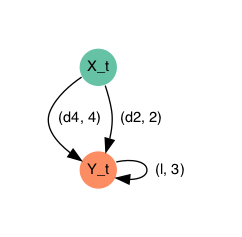

In [3]:
me.plots.net_main_plot(net);

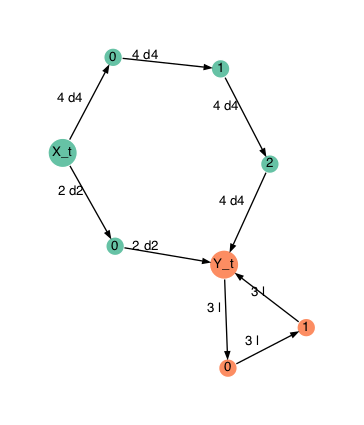

In [4]:
me.plots.net_hidden_plot(net);

In [7]:
# TODO: maybe plot individual Erlang channels here

theta_d4 = 0.03
theta_d2 = 0.04

act_times = np.linspace(0.0, 60.0)
alpha, S = me.utils.phase_type_from_parallel_erlang2(theta_d4, theta_d2, n_d4, n_d2)
act_times_pdf = me.utils.phase_type_pdf(alpha, S, act_times)

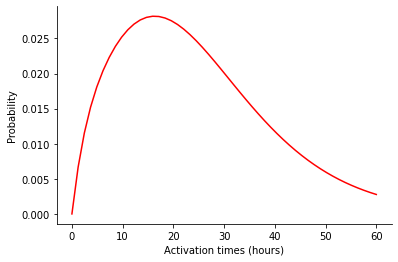

In [6]:
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(act_times, act_times_pdf, color='red')
plt.ylabel('Probability')
plt.xlabel('Activation times (hours)');

In [16]:
act_times

array([ 0.        ,  1.10204082,  2.20408163,  3.30612245,  4.40816327,
        5.51020408,  6.6122449 ,  7.71428571,  8.81632653,  9.91836735,
       11.02040816, 12.12244898, 13.2244898 , 14.32653061, 15.42857143,
       16.53061224, 17.63265306, 18.73469388, 19.83673469, 20.93877551,
       22.04081633, 23.14285714, 24.24489796, 25.34693878, 26.44897959,
       27.55102041, 28.65306122, 29.75510204, 30.85714286, 31.95918367,
       33.06122449, 34.16326531, 35.26530612, 36.36734694, 37.46938776,
       38.57142857, 39.67346939, 40.7755102 , 41.87755102, 42.97959184,
       44.08163265, 45.18367347, 46.28571429, 47.3877551 , 48.48979592,
       49.59183673, 50.69387755, 51.79591837, 52.89795918, 54.        ])

In [ ]:
theta_l = 0.06

##### Other reaction types